**1. Import Necessary Libraries**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

**2. To read the data into Python.**

In [ ]:
df = pd.read_csv('cleaned_nifty_ds.csv')
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Cr Rs)
0,2024-08-12,24320.05,24472.80,24212.10,24347.00,279925100,30311.85
1,2024-08-13,24342.35,24359.95,24116.50,24139.00,239727640,25459.58
2,2024-08-14,24184.40,24196.50,24099.70,24143.75,303254705,27834.61
3,2024-08-16,24334.85,24563.90,24204.50,24541.15,271611087,28521.90
4,2024-08-19,24636.35,24638.80,24522.95,24572.65,243645503,22124.41


In [21]:
numerical_cols = df.select_dtypes(include=np.number).columns
print(numerical_cols)

Index(['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (Cr Rs)'], dtype='object')


**3. Univariate Analysis: Analysis on numerical Variables**

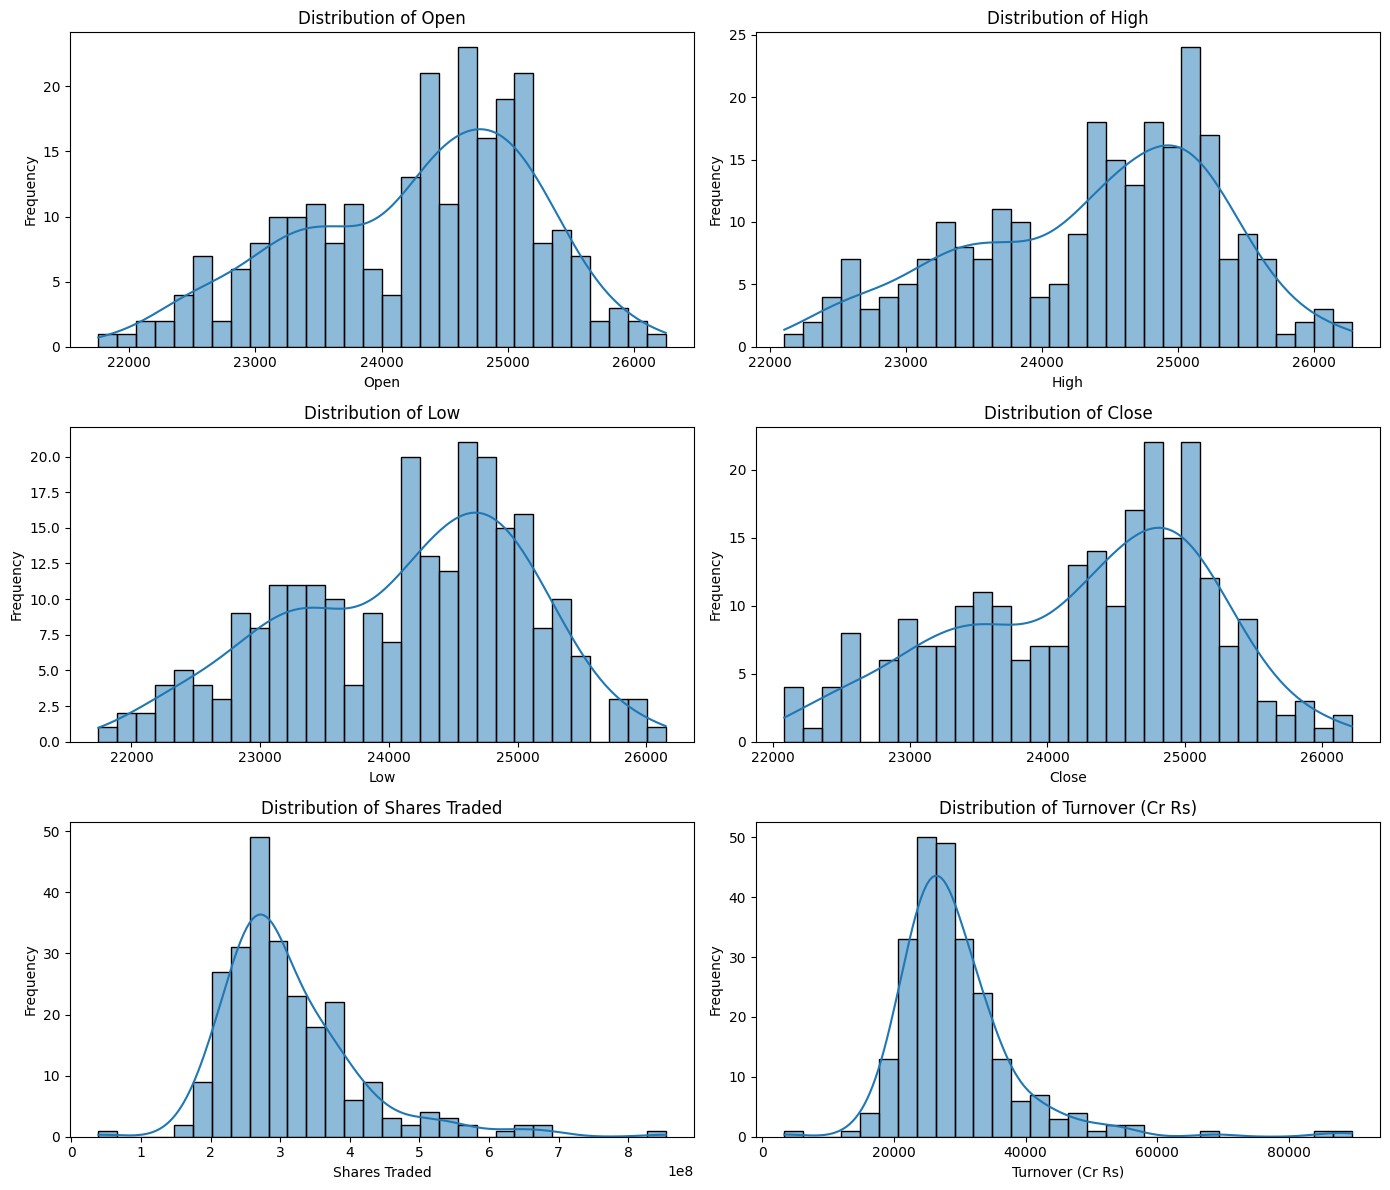

In [22]:
i=0
nrows = math.ceil(len(numerical_cols)/2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

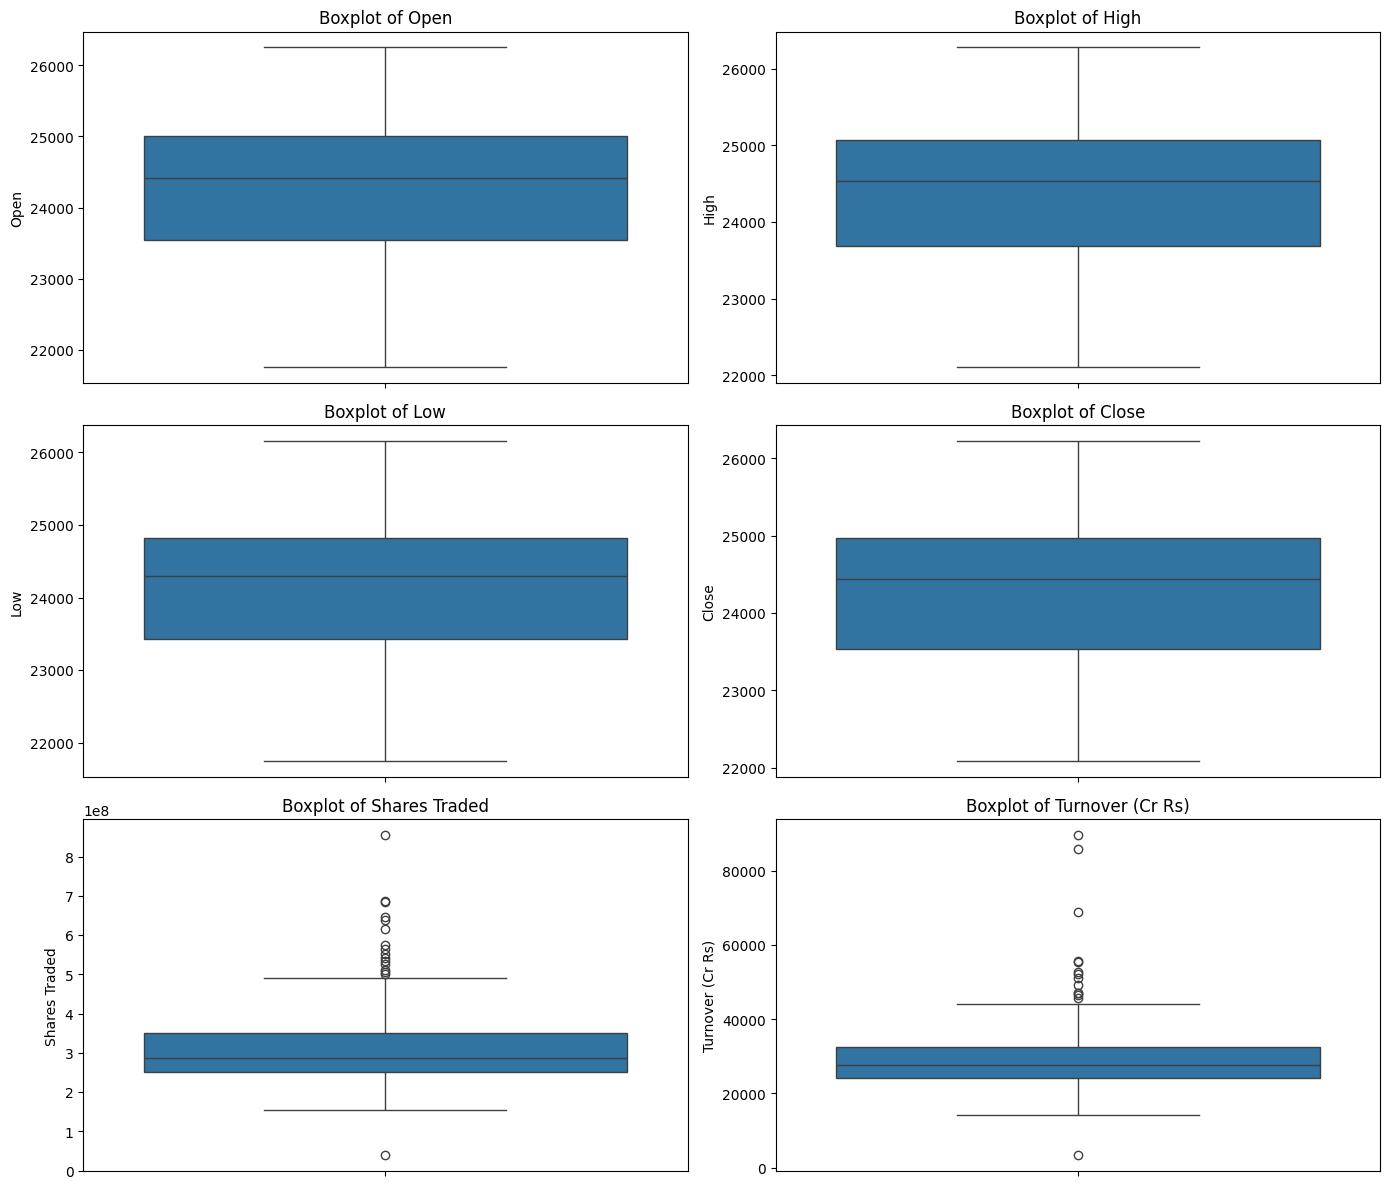

In [23]:
nrows = math.ceil(len(numerical_cols) / 2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Conclusion of Step 3**

In addition to initial statistical checks, detailed univariate analysis using histogram and boxplots confirmed the presence of significant outliers in key numerical attributes.

We conclude that the `Shares Traded` & `Turnover` attribute has **potential outliers & right-skewed / positive skewness**. The reasons are
* In histogram, most of the data points are concentrated on the right end, with a few values pulling the mean to the left.
* In box plot,
    - The median line is even little closer to the bottom of the box.
    - The space of the upper whisker is longer than the lower whisker.
    - Few Bubbles are plotted outside of the whisker which are actually the outliers.

These points, largely representing plausible but exceptionally high or low characteristics, suggest that careful consideration of data transformation (e.g., log scaling) will be essential during preprocessing to manage their potential impact on machine learning model performance and to normalize feature distributions.

**4. Explore Relationship between variables: Correlation Coefficient Heatmap**

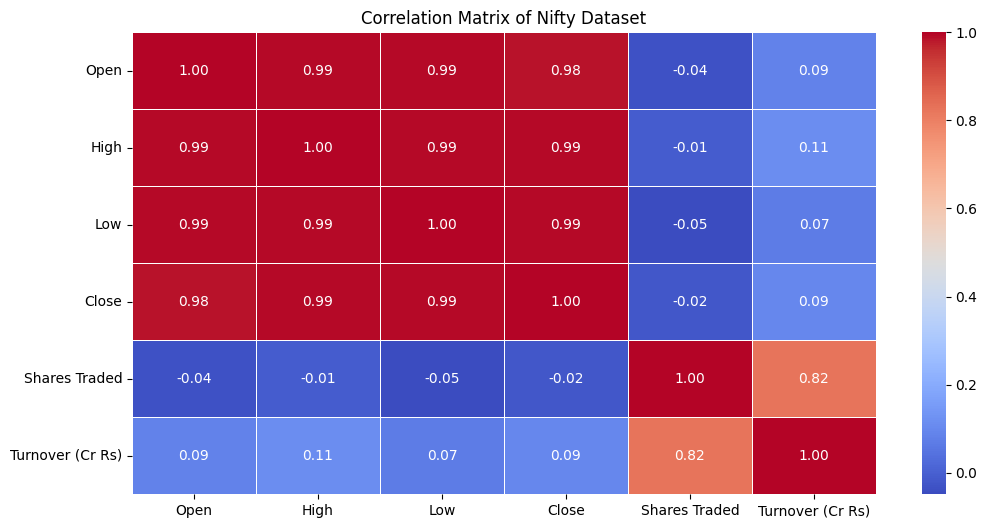

In [24]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Nifty Dataset')
plt.show()

**Conclusion of Step 4**

So, From the above correlation coefficient Heatmap, we can infer that,
* Positive Strong Correlation Exists between:
    * Open & High
    * Open & Low
    * Open & Close
    * Shares Traded & Turnover

So try with all features as it is and train the model, then engineer features Daily_Range = High - Low and Open_to_Close_Change = Close - Open while dropping shares Traded since Turnover is better for it normalizes the price of the day.

**5. Time Series Analysis:**

*Plotting the data over time helps you identify key components like trend (the long-term movement), seasonality (recurring patterns, which might not be obvious in daily stock data), and cyclicity (pattern that repeats over a fixed or predictable interval).*

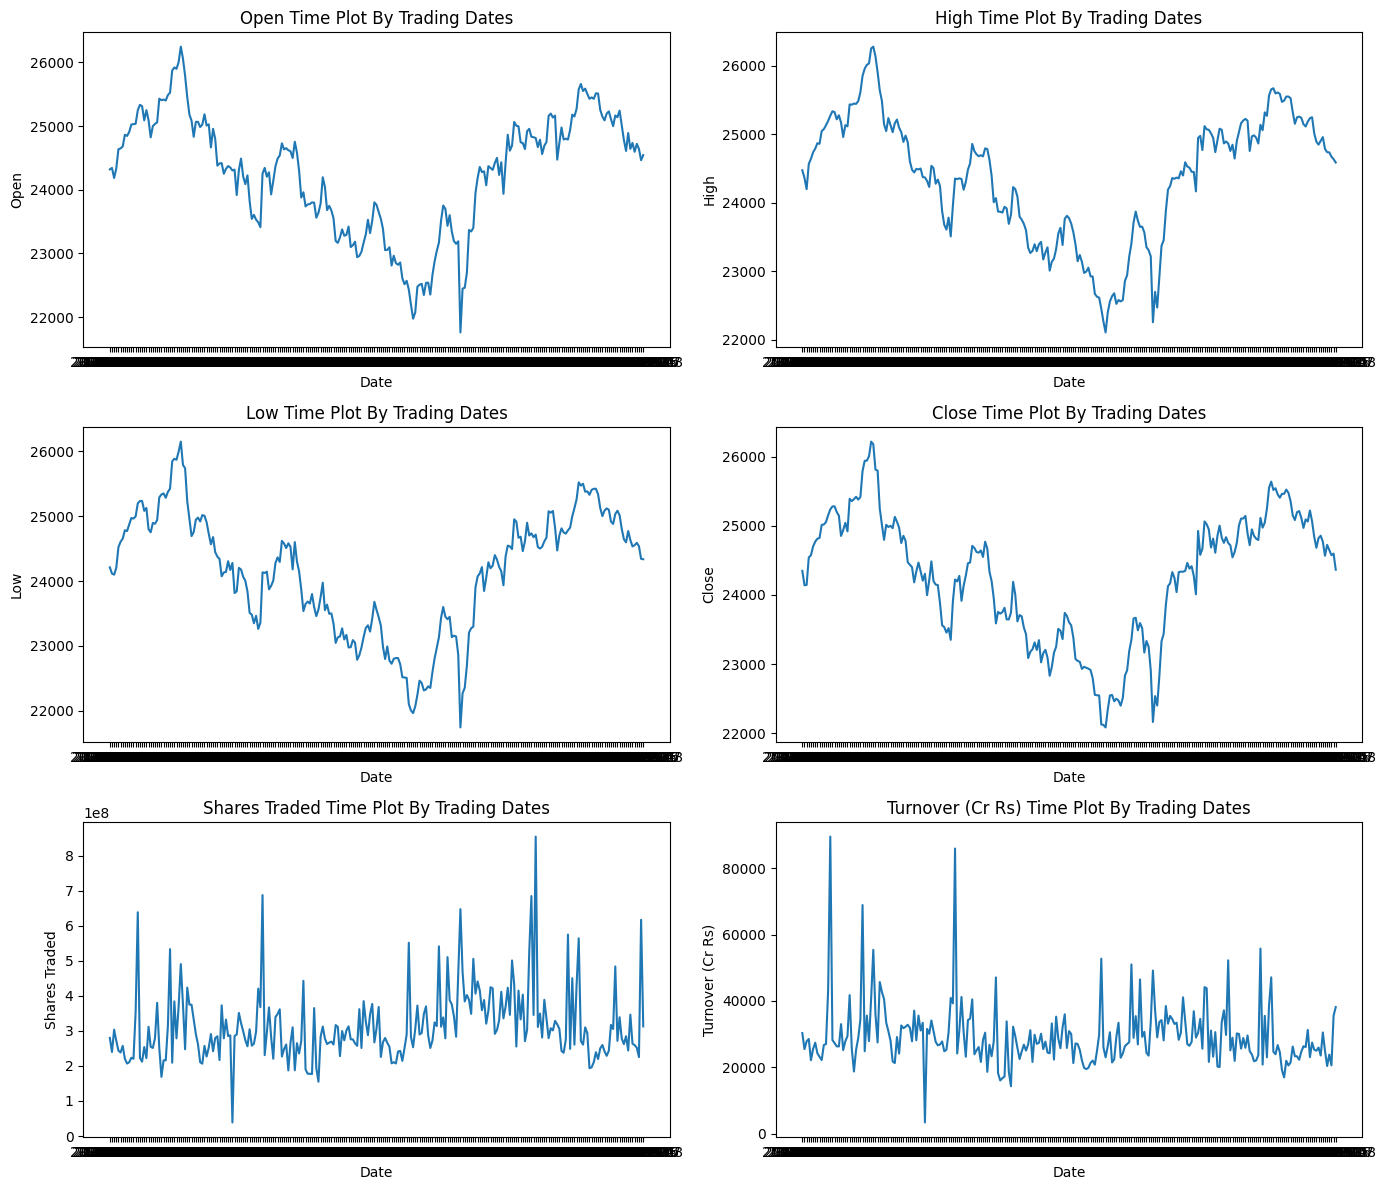

In [25]:
# Time plot
nrows = math.ceil(len(numerical_cols) / 2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, 2, i + 1)
    plt.plot(df['Date'], df[col])
    plt.title(f'{col} Time Plot By Trading Dates')
    plt.xlabel('Date')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

-----
**Final Decisions & Next steps:**

-----
- To Handle Outliers: [`Shares Traded`, `Turnover`]
    - Do nothing (or)
    - Remove outlier records (or)
    - Transform the data
- Feature Engineering:
    - Daily_Range = High - Low
    - Open_to_Close_Change = Close - Open
    - Drop shares Traded
- The data is cyclical.
    - Linear regression model might struggle with non-linear relationship.
    - Random forest could better perform with non-linear relationship.